In [1]:
import os.path as op
import os
# import sys
import numpy as np
import pandas as pd
import seaborn as sns
from fpdf import FPDF  

import mne
from mne.preprocessing import find_bad_channels_maxwell
import matplotlib.pyplot as plt
# from mne.time_frequency import psd_multitaper
from mne.preprocessing import annotate_muscle_zscore
from mne.preprocessing import ICA
from mne.preprocessing import read_ica
import scipy.stats

## Preprocessing

In [2]:

rawdir =  '/data/pt_02783/memory_grid/rawdir/'
out= '/data/pt_02774/memory_grid/'

subject_list = ['mg15','mg16','mg17','mg18','mg19','mg20','mg21','mg22','mg23','mg24','mg25','mg26','mg27', 'mg28','mg29','mg30','mg31','mg32','mg33','mg34','mg36','mg38','mg39','mg40','mg41','mg42','mg44','mg45','mg46','mg47']
subject_list = ['mg37']
subject_list = ['mg48']

In [3]:
subject_list[:]

['mg48']

In [4]:
# %load 04-extract_events.py
"""
===================
04. Extract events
===================

Extract events from the stimulus channel

Open issues:
    - metadata for exp 2 needs to be created

"""


def run_events():
    
    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
                              # os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")

    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        run_fname = op.join(data_path,
                            file_name + '.fif')
        raw = mne.io.read_raw_fif(
            run_fname,
            allow_maxshield=True,
            verbose=True)
        
        ###############
        # Read events #
        ###############
    
        
        # Find all events
        events = mne.find_events(raw,
                                 stim_channel='STI101',
                                 output='offset',
                                 consecutive = True,
                                 min_duration=0.010,
                                 mask = 65280,
                                 mask_type = 'not_and'
                                )
        events = events[events[:,2] != 255]
        
        # Concatenate all events
        events = np.concatenate([events],axis = 0)
        events = events[events[:,0].argsort(),:]
        
        # Show events
        fig = mne.viz.plot_events(events)
        fname_fig = op.join(out_path,
                            "04_r%s_events.png" % run)
        fig.savefig(fname_fig)
        plt.close(fig)
        
        '''
        # Add figure to report
        pdf.add_page()
        pdf.set_font('helvetica', 'B', 16)
        pdf.cell(0, 10, file_name)
        pdf.ln(20)
        pdf.set_font('helvetica', 'B', 12)
        pdf.cell(0, 10, 'Events', 'B', ln=1)
        pdf.image(fname_fig, 0, 45, pdf.epw)
        '''
        # Save event array
        fname_events = op.join(out_path,
                               file_name + '-eve.fif')                            
        mne.write_events(fname_events, events,overwrite = True)
        


Processing subject: mg48
  File: mg48a01
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a01.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 30000 ... 904999 =     30.000 ...   904.999 secs
Ready.


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


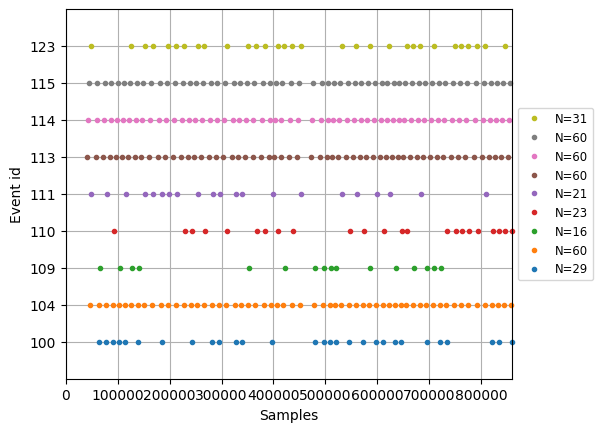

  File: mg48a02
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a02.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 81000 ... 931999 =     81.000 ...   931.999 secs
Ready.


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


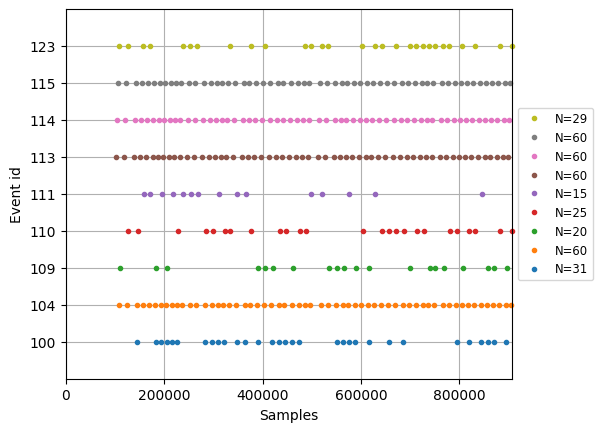

  File: mg48a03
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a03.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 71000 ... 885999 =     71.000 ...   885.999 secs
Ready.


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


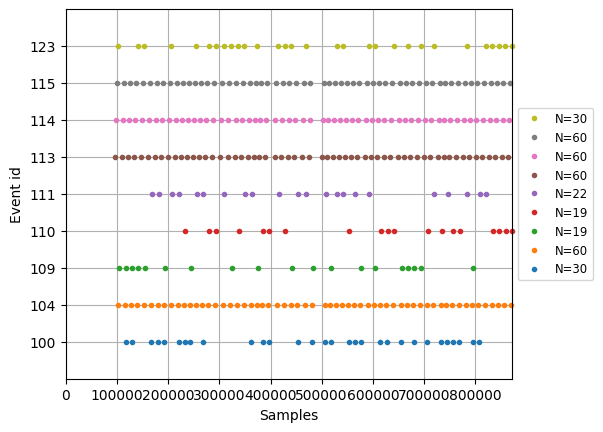

  File: mg48a04
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a04.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 84000 ... 888999 =     84.000 ...   888.999 secs
Ready.


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


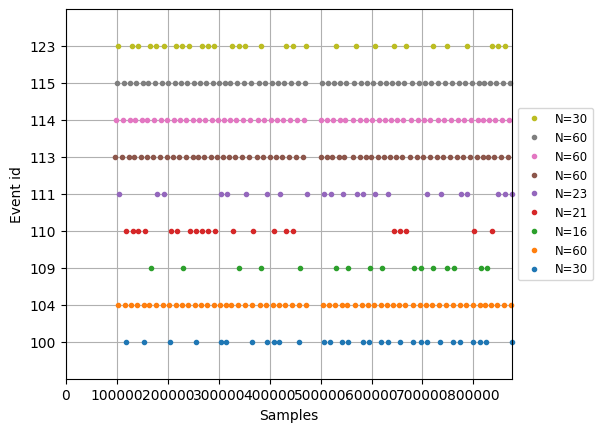

  File: mg48a05
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a05.fif...


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 24000 ... 793999 =     24.000 ...   793.999 secs
Ready.
360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


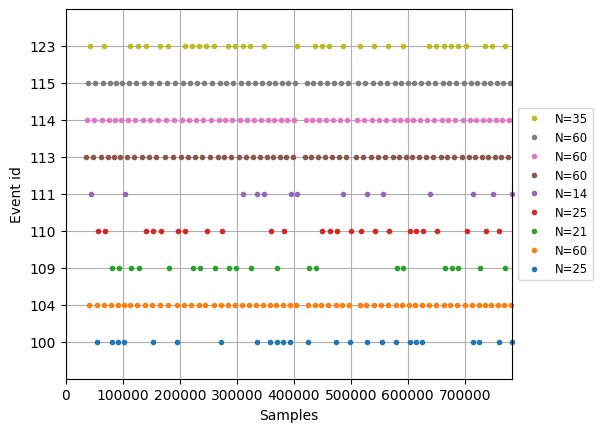

  File: mg48a06
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg48a/mg48a06.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 81000 ... 832999 =     81.000 ...   832.999 secs
Ready.


/tmp/ipykernel_18742/83167918.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg48a/mg48a06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


360 events found
Event IDs: [100 104 109 110 111 113 114 115 123]


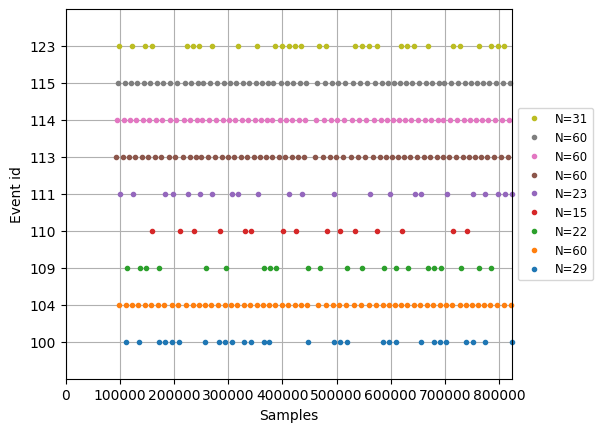

In [5]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = op.join(rawdir,subject_id+'a')
    file_exts = ['%sa01',
                     '%sa02',
                     '%sa03',
                     '%sa04',
                     '%sa05',
                     '%sa06']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(out, subject_id)
    if not op.exists(out_path):
        os.mkdir(out_path)




    # =============================================================================
    # RUN
    # =============================================================================

    # run_maxwell_filter(method=method)

    # filter_downsample()

    # artifact_annotation()

    
    # run_ica(max_iter = max_iter, 
    #        n_components = n_components, 
    #        random_state = random_state)
    
    run_events()

In [ ]:
## bb

In [ ]:
# %load 04-extract_events.py
"""
===================
04. Extract events
===================

Extract events from the stimulus channel

Open issues:
    - metadata for exp 2 needs to be created

"""


def run_events():
    
    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
                              # os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")

    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        run_fname = op.join(data_path,
                            file_name + '.fif')
        raw = mne.io.read_raw_fif(
            run_fname,
            allow_maxshield=True,
            verbose=True)
        
        ###############
        # Read events #
        ###############
    
        
        # Find all events
        events = mne.find_events(raw,
                                 stim_channel='STI101',
                                 output='offset',
                                 consecutive = True,
                                 min_duration=0.010,
                                 mask = 65280,
                                 mask_type = 'not_and'
                                )
        events = events[events[:,2] != 255]
        
        # Concatenate all events
        events = np.concatenate([events],axis = 0)
        events = events[events[:,0].argsort(),:]
        
        # Show events
        fig = mne.viz.plot_events(events)
        fname_fig = op.join(out_path,
                            "04_rb%s_events.png" % run)
        fig.savefig(fname_fig)
        plt.close(fig)
        
        '''
        # Add figure to report
        pdf.add_page()
        pdf.set_font('helvetica', 'B', 16)
        pdf.cell(0, 10, file_name)
        pdf.ln(20)
        pdf.set_font('helvetica', 'B', 12)
        pdf.cell(0, 10, 'Events', 'B', ln=1)
        pdf.image(fname_fig, 0, 45, pdf.epw)
        '''
        # Save event array
        fname_events = op.join(out_path,
                               file_name + '-eve.fif')                            
        mne.write_events(fname_events, events,overwrite = True)

In [ ]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = op.join(rawdir,subject_id+'b')
    if subject_id == 'mg16':
        
        file_exts = ['%sb07',
                     '%sb082',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']
    else:
        file_exts = ['%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(out, subject_id)
    if not op.exists(out_path):
        os.mkdir(out_path)




    # =============================================================================
    # RUN
    # =============================================================================

    # run_maxwell_filter(method=method)

    # filter_downsample()

    # artifact_annotation()

    
    # run_ica(max_iter = max_iter, 
    #        n_components = n_components, 
    #        random_state = random_state)
    
    run_events()

In [ ]:
# mg37

In [ ]:
# %load 04-extract_events.py
"""
===================
04. Extract events
===================

Extract events from the stimulus channel

Open issues:
    - metadata for exp 2 needs to be created

"""


def run_events():
    
    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
                              # os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")

    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        run_fname = op.join(data_path,
                            file_name + '.fif')
        raw = mne.io.read_raw_fif(
            run_fname,
            allow_maxshield=True,
            verbose=True)
        
        ###############
        # Read events #
        ###############
    
        
        # Find all events
        events = mne.find_events(raw,
                                 stim_channel='STI101',
                                 output='offset',
                                 consecutive = True,
                                 min_duration=0.010,
                                 mask = 65280,
                                 mask_type = 'not_and'
                                )
        events = events[events[:,2] != 255]
        
        # Concatenate all events
        events = np.concatenate([events],axis = 0)
        events = events[events[:,0].argsort(),:]
        
        # Show events
        fig = mne.viz.plot_events(events)
        fname_fig = op.join(out_path,
                            "04_rb%s_events.png" % run)
        fig.savefig(fname_fig)
        plt.close(fig)
        
        '''
        # Add figure to report
        pdf.add_page()
        pdf.set_font('helvetica', 'B', 16)
        pdf.cell(0, 10, file_name)
        pdf.ln(20)
        pdf.set_font('helvetica', 'B', 12)
        pdf.cell(0, 10, 'Events', 'B', ln=1)
        pdf.image(fname_fig, 0, 45, pdf.epw)
        '''
        # Save event array
        fname_events = op.join(out_path,
                               file_name + '-eve.fif')                            
        mne.write_events(fname_events, events,overwrite = True)

In [ ]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = op.join(rawdir,subject_id+'b')

    file_exts = ['%sb07',
                     '%sb08',
                     '%sb09',
                     '%sb10',
                     '%sb11',
                     '%sb12']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(out, subject_id)
    if not op.exists(out_path):
        os.mkdir(out_path)




    # =============================================================================
    # RUN
    # =============================================================================

    # run_maxwell_filter(method=method)

    # filter_downsample()

    # artifact_annotation()

    
    # run_ica(max_iter = max_iter, 
    #        n_components = n_components, 
    #        random_state = random_state)
    
    run_events()

In [27]:
# %load 04-extract_events.py
"""
===================
04. Extract events
===================

Extract events from the stimulus channel

Open issues:
    - metadata for exp 2 needs to be created

"""


def run_events():
    
    # stdout_obj = sys.stdout                 # store original stdout 
    # sys.stdout = open(op.join(out_path,     # open log file
                              # os.path.basename(__file__) + "_%s.txt" % (site_id+subject_id)),'w')
    
    # Prepare PDF report
    pdf = FPDF(orientation="P", unit="mm", format="A4")

    print("Processing subject: %s" % subject_id)
    run = 0
    for file_name in file_names:
        run = run + 1
        print("  File: %s" % file_name)
        
        # Read raw data
        run_fname = op.join(data_path,
                            file_name + '.fif')
        raw = mne.io.read_raw_fif(
            run_fname,
            allow_maxshield=True,
            verbose=True)
        
        ###############
        # Read events #
        ###############
    
        
        # Find all events
        events = mne.find_events(raw,
                                 stim_channel='STI101',
                                 output='offset',
                                 consecutive = True,
                                 min_duration=0.010,
                                 mask = 65280,
                                 mask_type = 'not_and'
                                )
        events = events[events[:,2] != 255]
        
        # Concatenate all events
        events = np.concatenate([events],axis = 0)
        events = events[events[:,0].argsort(),:]
        
        # Show events
        fig = mne.viz.plot_events(events)
        fname_fig = op.join(out_path,
                            "04_rc%s_events.png" % run)
        fig.savefig(fname_fig)
        plt.close(fig)
        
        '''
        # Add figure to report
        pdf.add_page()
        pdf.set_font('helvetica', 'B', 16)
        pdf.cell(0, 10, file_name)
        pdf.ln(20)
        pdf.set_font('helvetica', 'B', 12)
        pdf.cell(0, 10, 'Events', 'B', ln=1)
        pdf.image(fname_fig, 0, 45, pdf.epw)
        '''
        # Save event array
        fname_events = op.join(out_path,
                               file_name + '-eve.fif')                            
        mne.write_events(fname_events, events,overwrite = True)

Processing subject: mg37
  File: mg37c01
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c01.fif...


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c01.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 80000 ... 933999 =     80.000 ...   933.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


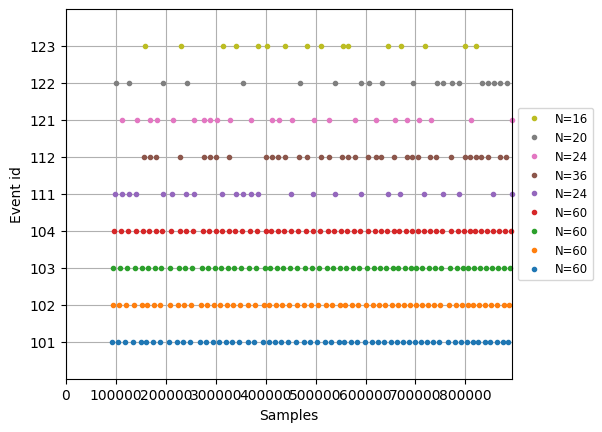

  File: mg37c02
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c02.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c02.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Range : 46000 ... 907999 =     46.000 ...   907.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


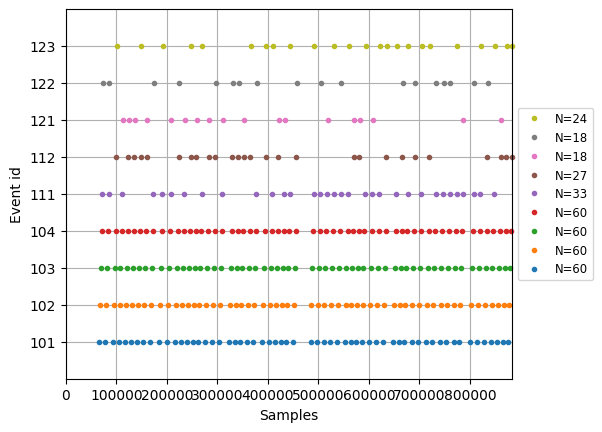

  File: mg37c03
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c03.fif...


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c03.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 25000 ... 860999 =     25.000 ...   860.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


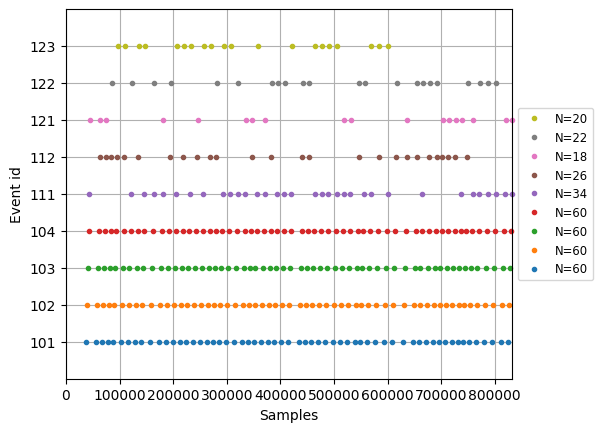

  File: mg37c04
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c04.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c04.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Range : 60000 ... 985999 =     60.000 ...   985.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


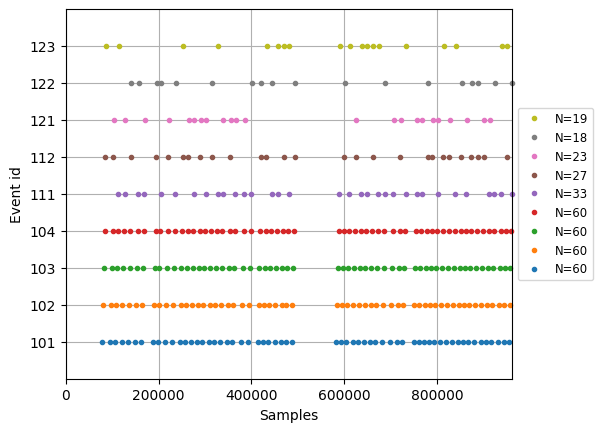

  File: mg37c05
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c05.fif...
    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c05.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Range : 55000 ... 856999 =     55.000 ...   856.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


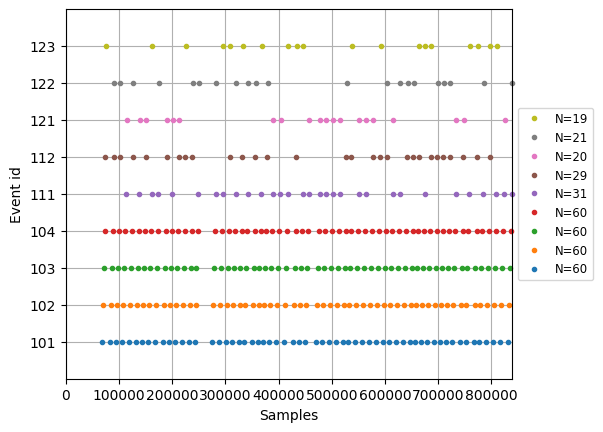

  File: mg37c06
Opening raw data file /data/pt_02783/memory_grid/rawdir/mg37c/mg37c06.fif...


/tmp/ipykernel_58130/4223972491.py:33: RuntimeWarning: This filename (/data/pt_02783/memory_grid/rawdir/mg37c/mg37c06.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(


    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
    Range : 58000 ... 924999 =     58.000 ...   924.999 secs
Ready.
360 events found
Event IDs: [101 102 103 104 111 112 121 122 123]


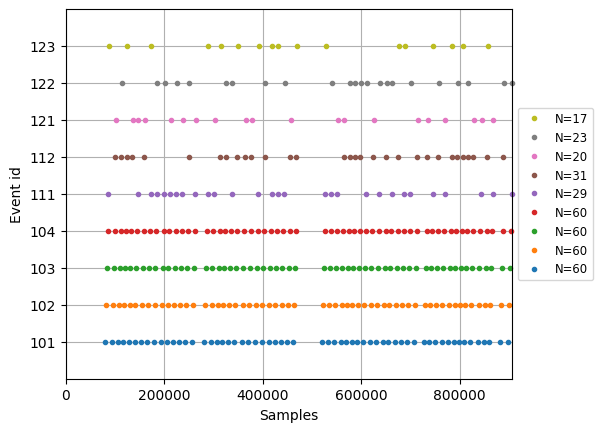

In [29]:
# %load config.py
"""
===========
Config file
===========

Configurate the parameters of the study.
"""
for subject_id in subject_list[:]:

    # =============================================================================
    # SESSION-SPECIFIC SETTINGS
    # =============================================================================

    # Set filename based on experiment number
    data_path = op.join(rawdir,subject_id+'c')

    file_exts = ['%sc01',
                     '%sc02',
                     '%sc03',
                     '%sc04',
                     '%sc05',
                     '%sc06']

    file_names = [f % (subject_id) for f in file_exts]


    # =============================================================================
    # GENERAL SETTINGS
    # =============================================================================

    # Set out_path folder or create it if it doesn't exist
    out_path = op.join(out, subject_id)
    if not op.exists(out_path):
        os.mkdir(out_path)




    # =============================================================================
    # RUN
    # =============================================================================

    # run_maxwell_filter(method=method)

    # filter_downsample()

    # artifact_annotation()

    
    # run_ica(max_iter = max_iter, 
    #        n_components = n_components, 
    #        random_state = random_state)
    
    run_events()